# Problem statement

This project analyzes loan data to derive insights, assess risks, and identify patterns. The dataset likely includes features such as applicant information, loan amounts, and payment statuses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("N:\Excel itvedant\loan_data.csv")

In [4]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
df.shape

(45000, 14)

In [6]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
Col=df.columns
Col

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [10]:
for i in Col:
    print(df[i].value_counts())
    print("*"*50)

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64
**************************************************
person_gender
male      24841
female    20159
Name: count, dtype: int64


In [11]:
num=df.describe().columns
num

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

number of people who take loan as group by gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64


<Axes: xlabel='person_gender', ylabel='count'>

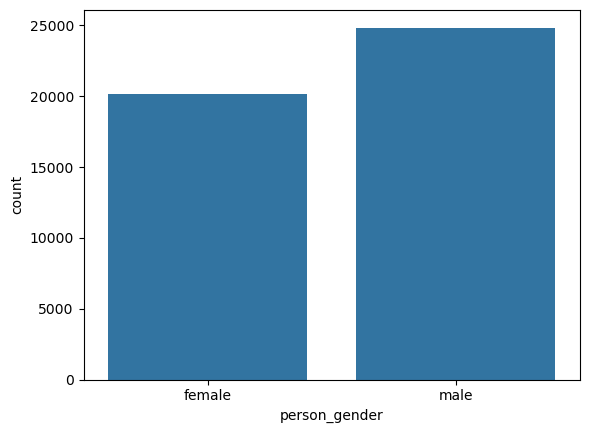

In [12]:
print("number of people who take loan as group by gender:")
print(df["person_gender"].value_counts())
sns.countplot(x="person_gender", data=df)

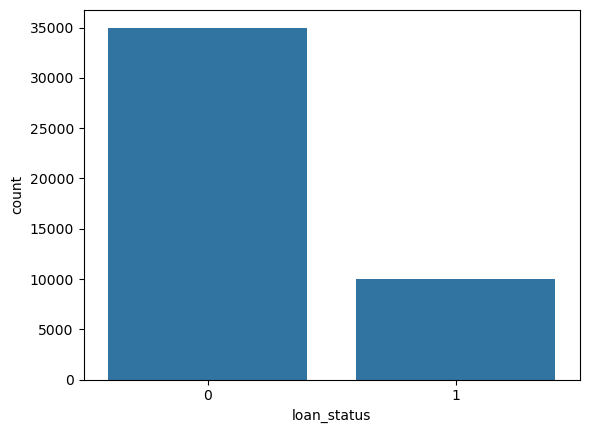

In [13]:
sns.countplot(x='loan_status', data=df)
plt.show()

# To detect the outliers 

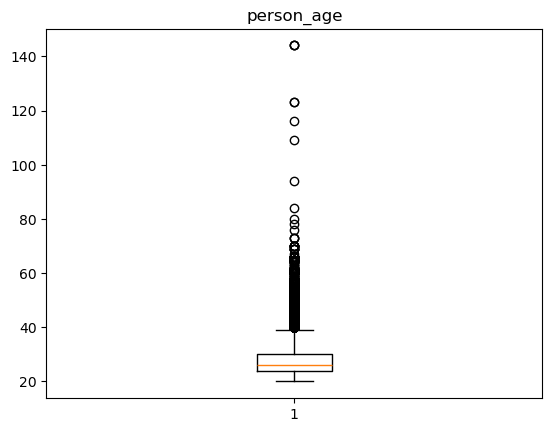

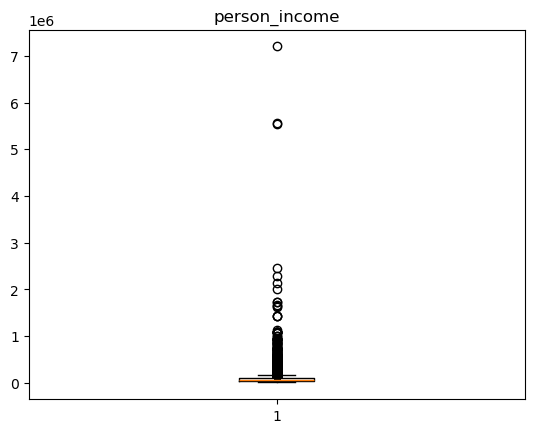

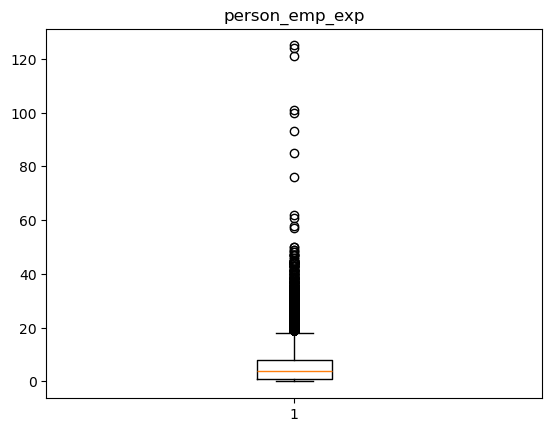

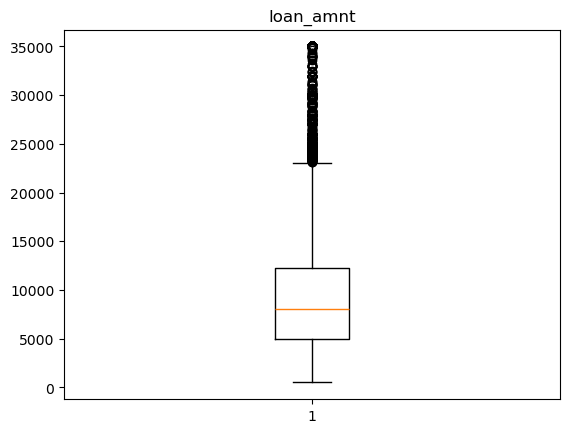

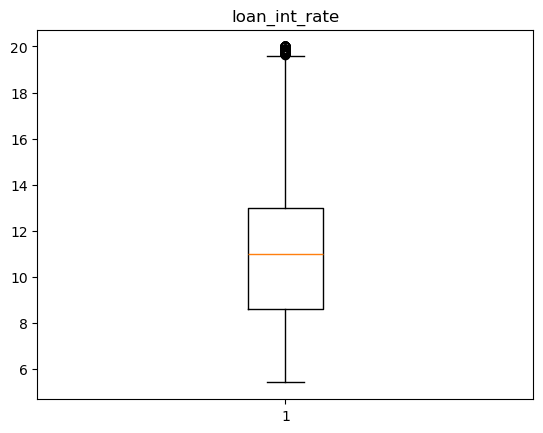

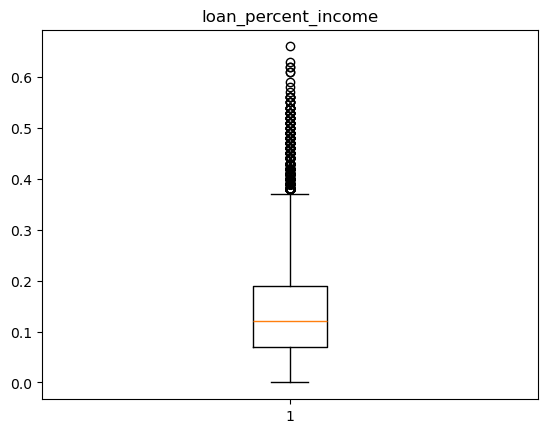

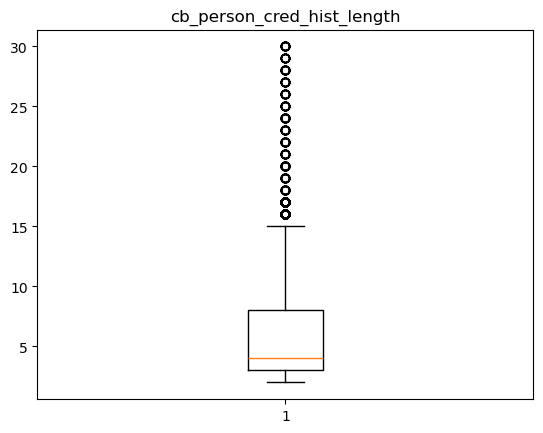

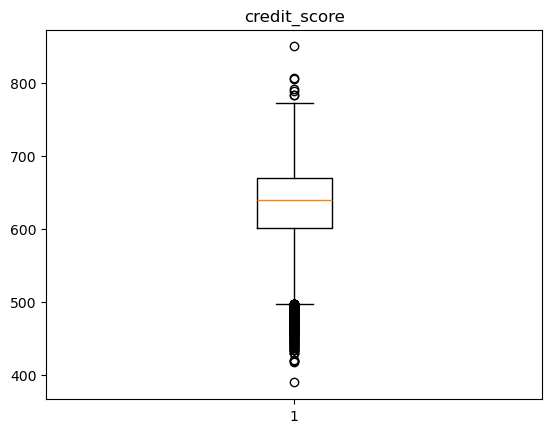

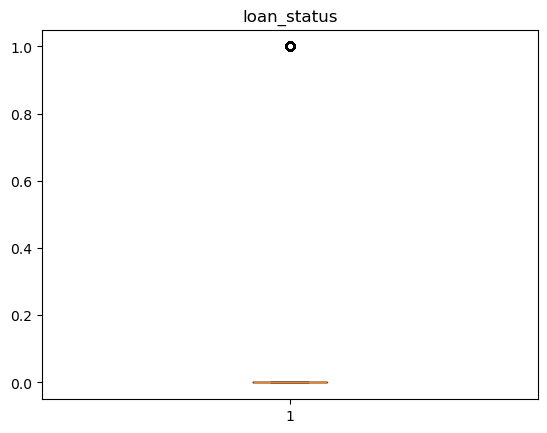

In [14]:
for i in num:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [15]:
df['person_age'].value_counts()

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64

In [16]:
q1=df['person_age'].quantile(0.25)
q3=df['person_age'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 24.0
q3 30.0
iqr 6.0
upper_tail 39.0
lower_tail 15.0


In [17]:
df.loc[df['person_age']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
29120,40.0,female,Bachelor,1440915.0,19,MORTGAGE,10000.0,MEDICAL,11.01,0.01,16.0,637,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44916,42.0,female,High School,100310.0,21,OTHER,12000.0,EDUCATION,16.16,0.12,14.0,665,No,1
44923,47.0,male,Associate,46637.0,24,RENT,13000.0,MEDICAL,11.70,0.28,18.0,705,No,1
44947,42.0,male,Doctorate,705960.0,21,MORTGAGE,20686.0,PERSONAL,10.74,0.03,16.0,689,No,1
44972,43.0,male,Associate,184295.0,20,MORTGAGE,25000.0,EDUCATION,20.00,0.14,15.0,720,No,1


In [18]:
df.loc[df['person_age']>ub, 'person_age']=ub

In [19]:
df.loc[df['person_age']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [20]:
df.loc[df['person_age']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [21]:
q1=df['person_income'].quantile(0.25)
q3=df['person_income'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 47204.0
q3 95789.25
iqr 48585.25
upper_tail 168667.125
lower_tail -25673.875


In [22]:
df.loc[df['person_income']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
15,23.0,female,Master,600891.0,5,MORTGAGE,30000.0,DEBTCONSOLIDATION,10.65,0.05,3.0,670,Yes,0
20,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
33,25.0,female,High School,368115.0,3,RENT,24250.0,DEBTCONSOLIDATION,13.85,0.07,3.0,567,Yes,0
34,26.0,female,Associate,361076.0,1,MORTGAGE,7800.0,MEDICAL,13.49,0.02,4.0,669,No,0
42,26.0,male,Bachelor,361293.0,5,MORTGAGE,20000.0,VENTURE,7.88,0.06,4.0,684,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44831,25.0,female,High School,192090.0,1,MORTGAGE,28523.0,MEDICAL,16.48,0.15,4.0,604,No,1
44836,26.0,male,Doctorate,293525.0,5,MORTGAGE,11635.0,DEBTCONSOLIDATION,15.81,0.04,4.0,689,No,1
44922,29.0,male,Master,726416.0,7,MORTGAGE,24890.0,MEDICAL,9.07,0.03,9.0,634,No,1
44947,39.0,male,Doctorate,705960.0,21,MORTGAGE,20686.0,PERSONAL,10.74,0.03,16.0,689,No,1


In [23]:
df.loc[df['person_income']>ub, 'person_income']=ub

In [24]:
df.loc[df['person_income']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [25]:
df.loc[df['person_income']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [26]:
df['person_emp_exp'].value_counts()

person_emp_exp
0      9566
2      4134
1      4061
3      3890
4      3524
       ... 
101       1
124       1
125       1
121       1
85        1
Name: count, Length: 63, dtype: int64

In [27]:
q1=df['person_emp_exp'].quantile(0.25)
q3=df['person_emp_exp'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 1.0
q3 8.0
iqr 7.0
upper_tail 18.5
lower_tail -9.5


In [28]:
df.loc[df['person_emp_exp']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,39.0,male,Bachelor,168667.125,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,39.0,male,Associate,168667.125,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,39.0,female,High School,97140.000,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,39.0,male,Bachelor,94723.000,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
29120,39.0,female,Bachelor,168667.125,19,MORTGAGE,10000.0,MEDICAL,11.01,0.01,16.0,637,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44916,39.0,female,High School,100310.000,21,OTHER,12000.0,EDUCATION,16.16,0.12,14.0,665,No,1
44923,39.0,male,Associate,46637.000,24,RENT,13000.0,MEDICAL,11.70,0.28,18.0,705,No,1
44947,39.0,male,Doctorate,168667.125,21,MORTGAGE,20686.0,PERSONAL,10.74,0.03,16.0,689,No,1
44972,39.0,male,Associate,168667.125,20,MORTGAGE,25000.0,EDUCATION,20.00,0.14,15.0,720,No,1


In [29]:
df.loc[df['person_emp_exp']>ub, 'person_emp_exp']=ub

In [30]:
df.loc[df['person_emp_exp']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [31]:
df.loc[df['person_emp_exp']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [32]:
df['loan_amnt'].value_counts()

loan_amnt
10000.0    3617
5000.0     2787
6000.0     2426
12000.0    2416
15000.0    2004
           ... 
9135.0        1
8389.0        1
7583.0        1
13069.0       1
6665.0        1
Name: count, Length: 4483, dtype: int64

In [33]:
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 5000.0
q3 12237.25
iqr 7237.25
upper_tail 23093.125
lower_tail -5855.875


In [34]:
df.loc[df['loan_amnt']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.000,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
3,23.0,female,Bachelor,79753.000,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.000,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
6,26.0,female,Bachelor,93471.000,1.0,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.000,5.0,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44922,29.0,male,Master,168667.125,7.0,MORTGAGE,24890.0,MEDICAL,9.07,0.03,9.0,634,No,1
44944,26.0,male,Associate,97590.000,7.0,RENT,30000.0,DEBTCONSOLIDATION,9.45,0.31,3.0,666,No,1
44952,23.0,female,Associate,72843.000,1.0,RENT,24000.0,PERSONAL,7.38,0.33,3.0,656,No,1
44970,26.0,female,Bachelor,84780.000,3.0,RENT,25000.0,EDUCATION,14.26,0.29,5.0,641,No,1


In [35]:
df.loc[df['loan_amnt']>ub, 'loan_amnt']=ub

In [36]:
df.loc[df['loan_amnt']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [37]:
df.loc[df['loan_amnt']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [38]:
q1=df['loan_int_rate'].quantile(0.25)
q3=df['loan_int_rate'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 8.59
q3 12.99
iqr 4.4
upper_tail 19.59
lower_tail 1.9899999999999993


In [39]:
df.loc[df['loan_int_rate']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
17,23.0,female,High School,111369.000,0.0,RENT,23093.125,MEDICAL,20.00,0.31,4.0,694,No,1
112,25.0,female,Bachelor,168667.125,3.0,MORTGAGE,23093.125,HOMEIMPROVEMENT,19.91,0.11,2.0,637,Yes,0
349,25.0,male,Associate,168667.125,0.0,MORTGAGE,23093.125,HOMEIMPROVEMENT,19.74,0.13,4.0,669,No,0
420,23.0,male,High School,71875.000,1.0,RENT,23093.125,DEBTCONSOLIDATION,19.69,0.33,2.0,585,No,1
440,22.0,male,Bachelor,100479.000,0.0,RENT,23093.125,DEBTCONSOLIDATION,19.69,0.24,3.0,590,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44762,34.0,male,Master,71692.000,13.0,MORTGAGE,12000.000,MEDICAL,20.00,0.17,10.0,663,No,1
44850,31.0,female,High School,92212.000,10.0,RENT,23093.125,PERSONAL,20.00,0.27,8.0,658,No,1
44920,26.0,female,Associate,53574.000,6.0,RENT,12120.000,EDUCATION,19.62,0.23,3.0,603,No,1
44965,31.0,male,Associate,100407.000,9.0,RENT,17783.000,VENTURE,19.80,0.18,8.0,655,No,1


In [40]:
df.loc[df['loan_int_rate']>ub, 'loan_int_rate']=ub

In [41]:
df.loc[df['loan_int_rate']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [42]:
df.loc[df['loan_int_rate']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [43]:
df['loan_percent_income'].value_counts()

loan_percent_income
0.08    2593
0.10    2421
0.07    2415
0.09    2295
0.06    2242
        ... 
0.57       1
0.66       1
0.58       1
0.63       1
0.59       1
Name: count, Length: 64, dtype: int64

In [44]:
q1=df['loan_percent_income'].quantile(0.25)
q3=df['loan_percent_income'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 0.07
q3 0.19
iqr 0.12
upper_tail 0.37
lower_tail -0.10999999999999999


In [45]:
df.loc[df['loan_percent_income']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.49,3.0,561,No,1
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.53,4.0,586,No,1
22,22.0,female,Master,79255.0,0.0,RENT,23093.125,EDUCATION,17.58,0.43,4.0,691,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44940,29.0,male,High School,30046.0,7.0,RENT,12092.000,PERSONAL,11.79,0.40,7.0,535,No,1
44942,27.0,male,Master,48432.0,8.0,RENT,20223.000,VENTURE,6.83,0.42,8.0,650,No,1
44966,26.0,female,Bachelor,36844.0,0.0,RENT,16000.000,DEBTCONSOLIDATION,12.00,0.43,5.0,620,No,1
44986,34.0,male,Bachelor,41876.0,14.0,RENT,19594.000,DEBTCONSOLIDATION,12.03,0.47,8.0,707,No,1


In [46]:
df.loc[df['loan_percent_income']>ub, 'loan_percent_income']=ub

In [47]:
df.loc[df['loan_percent_income']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [48]:
df.loc[df['loan_percent_income']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [49]:
q1=df['cb_person_cred_hist_length'].quantile(0.25)
q3=df['cb_person_cred_hist_length'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 3.0
q3 8.0
iqr 5.0
upper_tail 15.5
lower_tail -4.5


In [50]:
df['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
4.0     8653
3.0     8312
2.0     6537
5.0     3082
6.0     2966
7.0     2889
8.0     2800
9.0     2685
10.0    2457
12.0     715
11.0     712
14.0     644
13.0     625
15.0     557
16.0     542
17.0     469
20.0      43
24.0      34
18.0      34
22.0      32
28.0      29
19.0      29
23.0      26
21.0      24
25.0      23
27.0      23
30.0      23
26.0      20
29.0      15
Name: count, dtype: int64

In [51]:
df.loc[df['cb_person_cred_hist_length']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
29120,39.0,female,Bachelor,168667.125,18.5,MORTGAGE,10000.000,MEDICAL,11.01,0.01,16.0,637,Yes,0
29125,37.0,male,Bachelor,97166.000,14.0,RENT,23093.125,HOMEIMPROVEMENT,11.99,0.36,17.0,637,No,1
29127,39.0,male,High School,168667.125,18.5,MORTGAGE,20000.000,MEDICAL,11.01,0.03,16.0,563,No,1
29130,37.0,female,Associate,103064.000,11.0,RENT,23093.125,HOMEIMPROVEMENT,8.90,0.34,17.0,656,No,1
29133,39.0,male,Associate,168667.125,17.0,MORTGAGE,16000.000,DEBTCONSOLIDATION,7.90,0.03,17.0,660,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44627,39.0,male,Doctorate,70131.000,18.5,RENT,1500.000,MEDICAL,16.17,0.02,22.0,735,No,1
44705,39.0,female,Bachelor,59758.000,18.5,RENT,7399.000,MEDICAL,13.04,0.12,20.0,751,No,1
44734,39.0,male,Master,67306.000,15.0,RENT,23093.125,HOMEIMPROVEMENT,13.74,0.37,16.0,723,No,1
44923,39.0,male,Associate,46637.000,18.5,RENT,13000.000,MEDICAL,11.70,0.28,18.0,705,No,1


In [52]:
df.loc[df['cb_person_cred_hist_length']>ub, 'cb_person_cred_hist_length']=ub

In [53]:
df.loc[df['cb_person_cred_hist_length']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [54]:
df.loc[df['cb_person_cred_hist_length']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [55]:
q1=df['credit_score'].quantile(0.25)
q3=df['credit_score'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 601.0
q3 670.0
iqr 69.0
upper_tail 773.5
lower_tail 497.5


In [56]:
df.loc[df['credit_score']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,39.0,male,Bachelor,168667.125,18.5,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,39.0,male,Associate,168667.125,18.5,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,39.0,female,High School,97140.000,18.5,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
32297,39.0,female,Associate,168667.125,18.5,MORTGAGE,5000.0,PERSONAL,12.73,0.00,15.5,850,No,0
32378,39.0,male,Master,97535.000,18.5,RENT,4800.0,MEDICAL,14.79,0.05,15.5,784,No,0
32506,39.0,male,High School,114705.000,18.5,MORTGAGE,10000.0,PERSONAL,7.51,0.09,15.5,784,Yes,0
38113,39.0,male,High School,168667.125,18.5,MORTGAGE,6195.0,VENTURE,12.58,0.00,15.5,792,No,0


In [57]:
df.loc[df['credit_score']>ub, 'credit_score']=ub

In [58]:
df.loc[df['credit_score']>ub]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [59]:
df.loc[df['credit_score']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
172,25.0,male,High School,75504.0,4.0,RENT,23093.125,MEDICAL,12.73,0.33,2.0,484.0,No,1
353,23.0,female,High School,19859.0,0.0,OWN,2000.000,PERSONAL,6.39,0.10,3.0,491.0,Yes,0
596,22.0,male,High School,45716.0,0.0,RENT,20000.000,DEBTCONSOLIDATION,16.69,0.37,3.0,447.0,No,1
748,23.0,female,High School,74473.0,0.0,RENT,20000.000,MEDICAL,11.14,0.27,2.0,460.0,No,1
764,25.0,male,High School,89914.0,7.0,RENT,20000.000,PERSONAL,15.95,0.22,4.0,477.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44618,28.0,female,Bachelor,59767.0,7.0,RENT,15000.000,MEDICAL,13.67,0.25,5.0,492.0,No,1
44676,24.0,female,Associate,37217.0,1.0,RENT,5000.000,EDUCATION,12.95,0.13,2.0,462.0,No,1
44754,25.0,male,High School,86195.0,3.0,RENT,2636.000,DEBTCONSOLIDATION,15.04,0.03,3.0,488.0,No,1
44954,25.0,female,High School,19819.0,1.0,RENT,3245.000,EDUCATION,12.10,0.16,4.0,482.0,No,1


In [60]:
df.loc[df['credit_score']<lb, 'credit_score']=lb

In [61]:
df.loc[df['credit_score']<lb]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


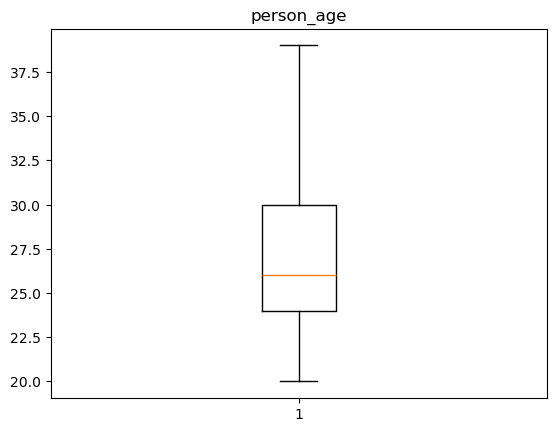

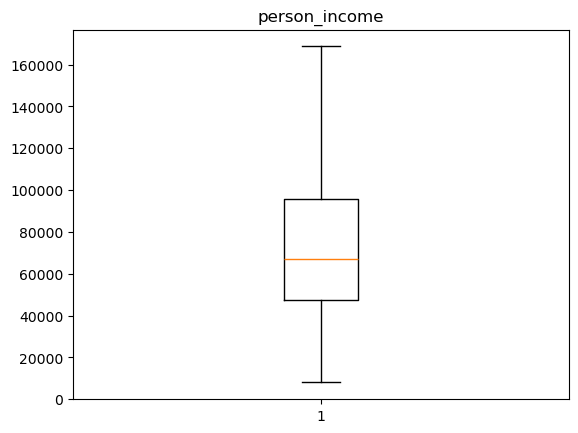

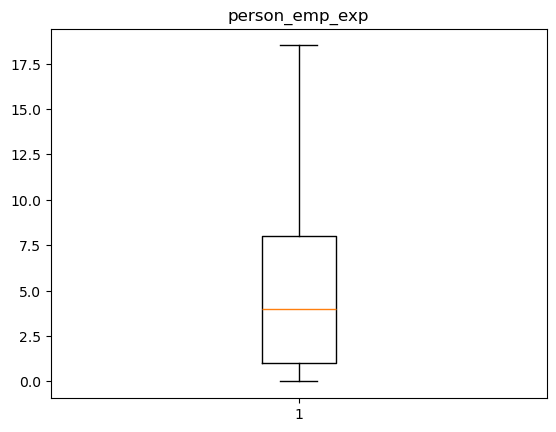

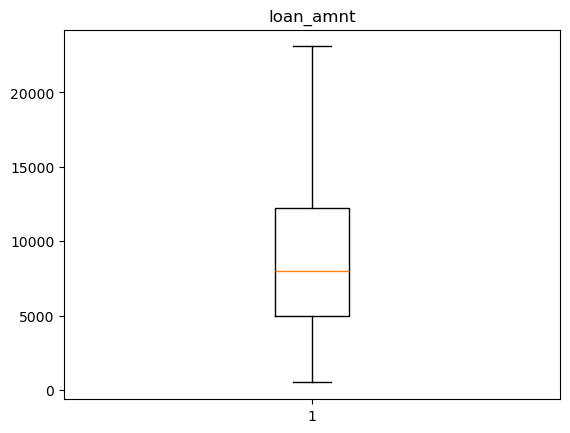

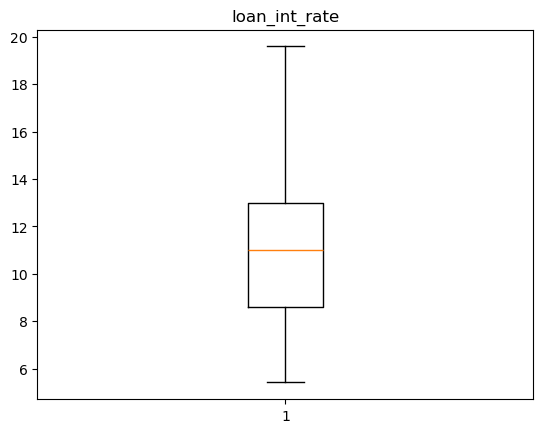

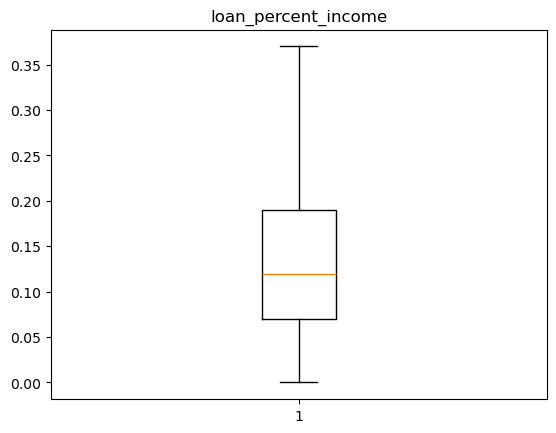

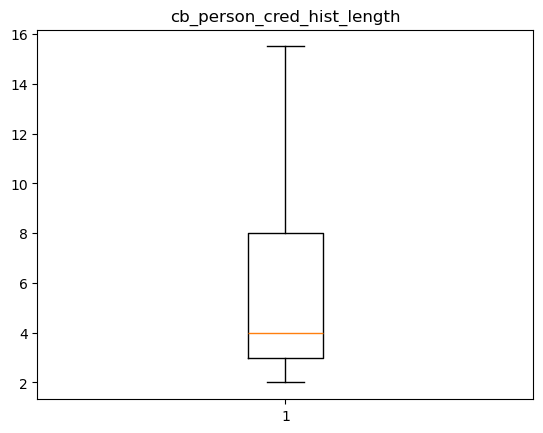

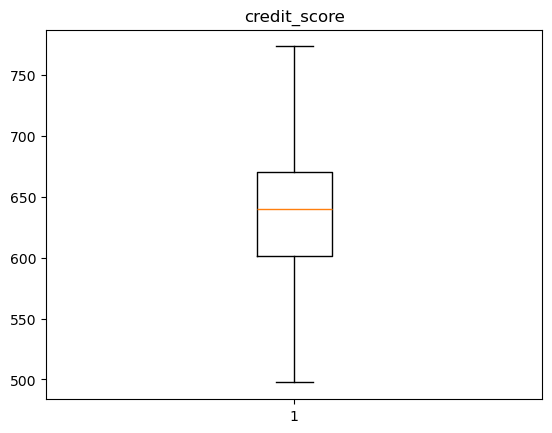

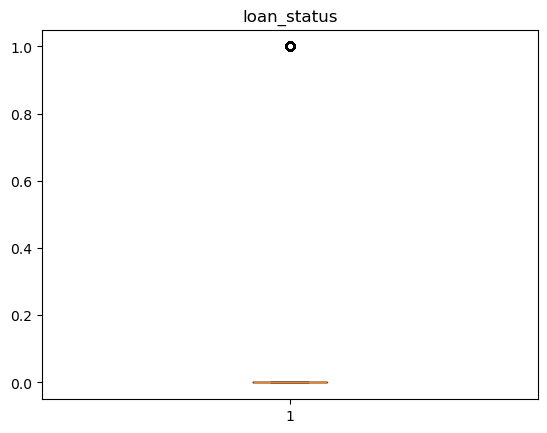

In [62]:
for i in num:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [63]:
cat_col= df.select_dtypes(object)
cat_col

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [64]:
obj_c = cat_col.columns
obj_c

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

#LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder
p=LabelEncoder()

In [66]:
cat_col['person_gender']=p.fit_transform(cat_col['person_gender'])
cat_col['person_education']=p.fit_transform(cat_col['person_education'])
cat_col['person_home_ownership']=p.fit_transform(cat_col['person_home_ownership']) 
cat_col['loan_intent']=p.fit_transform(cat_col['loan_intent'])
cat_col['previous_loan_defaults_on_file']=p.fit_transform(cat_col['previous_loan_defaults_on_file'])

In [67]:
cat_col

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,0,4,3,4,0
1,0,3,2,1,1
2,0,3,0,3,0
3,0,1,3,3,0
4,1,4,3,3,0
...,...,...,...,...,...
44995,1,0,3,3,0
44996,0,0,3,2,0
44997,1,0,3,0,0
44998,1,1,3,1,0


In [68]:
num_col=df.select_dtypes(exclude=object)
num_col

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,1
1,21.0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,0
2,25.0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,1
3,23.0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,1
4,24.0,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6.0,15000.000,15.66,0.31,3.0,645.0,1
44996,37.0,65800.0,17.0,9000.000,14.07,0.14,11.0,621.0,1
44997,33.0,56942.0,7.0,2771.000,10.02,0.05,10.0,668.0,1
44998,29.0,33164.0,4.0,12000.000,13.23,0.36,6.0,604.0,1


In [69]:
n=num_col.columns
n

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

#MinMaxScaler

In [70]:
from sklearn.preprocessing import MinMaxScaler
q=MinMaxScaler()

In [71]:
for i in n:
    num_col[i]=q.fit_transform(num_col[[i]])

In [72]:
num_col

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,0.105263,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072,1.0
1,0.052632,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551,0.0
2,0.263158,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188,1.0
3,0.157895,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116,1.0
4,0.210526,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652,1.0
...,...,...,...,...,...,...,...,...,...
44995,0.368421,0.248781,0.324324,0.641788,0.722653,0.837838,0.074074,0.534420,1.0
44996,0.894737,0.359750,0.918919,0.376221,0.610445,0.378378,0.666667,0.447464,1.0
44997,0.684211,0.304617,0.378378,0.100517,0.324629,0.135135,0.592593,0.617754,1.0
44998,0.473684,0.156622,0.216216,0.509004,0.551164,0.972973,0.296296,0.385870,1.0


In [73]:
new_df=pd.concat([cat_col, num_col], axis=1)
new_df

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,0,4,3,4,0,0.105263,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072,1.0
1,0,3,2,1,1,0.052632,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551,0.0
2,0,3,0,3,0,0.263158,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188,1.0
3,0,1,3,3,0,0.157895,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116,1.0
4,1,4,3,3,0,0.210526,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1,0,3,3,0,0.368421,0.248781,0.324324,0.641788,0.722653,0.837838,0.074074,0.534420,1.0
44996,0,0,3,2,0,0.894737,0.359750,0.918919,0.376221,0.610445,0.378378,0.666667,0.447464,1.0
44997,1,0,3,0,0,0.684211,0.304617,0.378378,0.100517,0.324629,0.135135,0.592593,0.617754,1.0
44998,1,1,3,1,0,0.473684,0.156622,0.216216,0.509004,0.551164,0.972973,0.296296,0.385870,1.0


In [74]:
numbers=new_df.columns
numbers

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file', 'person_age',
       'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'loan_status'],
      dtype='object')

In [75]:
for i in numbers:
    print(i, skew(new_df[i]))
    print("*"*50)

person_gender -0.20922442333083613
**************************************************
person_education 0.23743108994399467
**************************************************
person_home_ownership -0.2850955413595356
**************************************************
loan_intent -0.02088075753966174
**************************************************
previous_loan_defaults_on_file -0.03182625109910226
**************************************************
person_age 0.9146053209513779
**************************************************
person_income 0.8746067095151813
**************************************************
person_emp_exp 1.073152311455233
**************************************************
loan_amnt 0.8133609296452752
**************************************************
loan_int_rate 0.20716108864881397
**************************************************
loan_percent_income 0.8280685941564926
**************************************************
cb_person_cred_hist_length 1.1050002850839

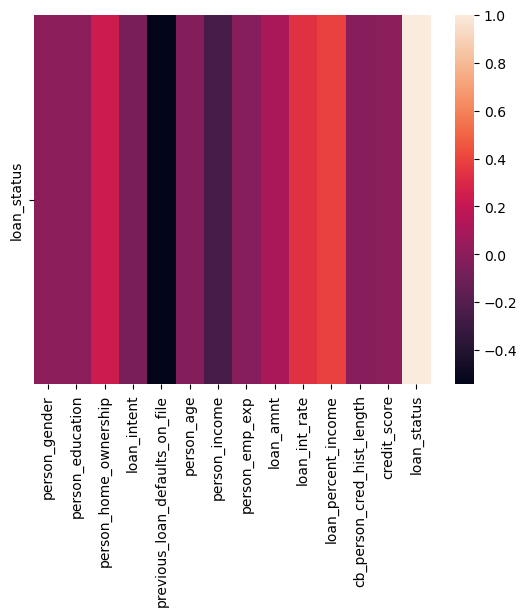

In [76]:
sns.heatmap(new_df.corr().tail(1))
plt.show()

In [77]:
new_df.corr().tail(1)

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
loan_status,-0.000561,-0.001747,0.233842,-0.072158,-0.543096,-0.025667,-0.249146,-0.023626,0.107306,0.331851,0.38466,-0.017596,-0.00768,1.0


In [78]:
x = new_df.drop('loan_status', axis= 1)
y = new_df['loan_status']

In [79]:
x

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0,4,3,4,0,0.105263,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072
1,0,3,2,1,1,0.052632,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551
2,0,3,0,3,0,0.263158,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188
3,0,1,3,3,0,0.157895,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116
4,1,4,3,3,0,0.210526,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1,0,3,3,0,0.368421,0.248781,0.324324,0.641788,0.722653,0.837838,0.074074,0.534420
44996,0,0,3,2,0,0.894737,0.359750,0.918919,0.376221,0.610445,0.378378,0.666667,0.447464
44997,1,0,3,0,0,0.684211,0.304617,0.378378,0.100517,0.324629,0.135135,0.592593,0.617754
44998,1,1,3,1,0,0.473684,0.156622,0.216216,0.509004,0.551164,0.972973,0.296296,0.385870


In [80]:
y

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
44995    1.0
44996    1.0
44997    1.0
44998    1.0
44999    1.0
Name: loan_status, Length: 45000, dtype: float64

In [81]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [83]:
x_train

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
24721,1,0,0,4,1,0.631579,0.516702,0.486486,0.951617,0.599859,0.648649,0.592593,0.567029
12113,1,0,0,3,0,0.315789,0.426970,0.162162,0.464743,0.175018,0.378378,0.074074,0.661232
31225,0,3,2,1,1,0.947368,0.563401,0.918919,0.287698,0.322512,0.189189,0.666667,0.708333
41422,1,1,0,4,1,0.368421,1.000000,0.270270,0.623774,0.554693,0.135135,0.222222,0.367754
35803,0,4,3,4,0,0.263158,0.284763,0.054054,0.420482,0.244884,0.513514,0.000000,0.480072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,1,4,0,1,1,0.263158,0.134626,0.000000,0.044483,0.387438,0.135135,0.148148,0.719203
28017,1,0,3,3,1,0.368421,0.145244,0.270270,0.090736,0.624559,0.216216,0.518519,0.650362
29199,1,0,3,2,0,0.842105,0.473407,0.594595,1.000000,0.647142,0.810811,0.740741,0.335145
40061,1,4,3,5,1,0.210526,0.062514,0.000000,0.058115,0.182781,0.270270,0.074074,0.121377


In [84]:
x_test       #0-female  1-male

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
5216,0,1,3,2,0,0.263158,0.815805,0.162162,0.376221,0.147495,0.162162,0.074074,0.625000
5502,0,0,3,5,1,0.105263,0.422271,0.054054,0.199176,0.513056,0.189189,0.074074,0.538043
3375,1,3,3,0,1,0.105263,0.296122,0.000000,0.464743,0.393084,0.540541,0.000000,0.317029
27464,1,4,0,1,0,0.368421,1.000000,0.108108,0.597527,0.394495,0.216216,0.222222,0.708333
25138,1,3,0,4,1,0.473684,0.551718,0.000000,0.199176,0.163726,0.135135,0.518519,0.139493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,0,3,0,0,0,0.210526,0.181188,0.216216,0.730311,0.463656,1.000000,0.074074,0.519928
5138,1,3,3,0,1,0.105263,0.405086,0.000000,0.376221,0.454481,0.324324,0.148148,0.000000
30591,1,3,3,1,1,1.000000,0.254352,0.918919,0.331959,0.121383,0.432432,1.000000,0.375000
28312,0,3,0,3,1,0.631579,0.486914,0.378378,0.597527,0.110797,0.432432,0.222222,0.480072


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logistics_model = LogisticRegression()
logistics_model.fit(x_train, y_train)

LogisticRegression()

In [87]:
y_pred =logistics_model.predict(x_test)

In [88]:
lr_test_accuracy=accuracy_score(y_test, y_pred)
lr_test_accuracy

0.8925925925925926

In [89]:
y_predd =logistics_model.predict(x_train)

In [90]:
lr_train_accuracy=accuracy_score(y_train, y_predd)
lr_train_accuracy

0.8909206349206349

In [91]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
print("classification report:", clf_report)

classification report:               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     10503
         1.0       0.77      0.74      0.75      2997

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



# Model Training

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [93]:
dt_clf = DecisionTreeClassifier(random_state =11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

# Model Evaluation

In [94]:
y_pred = dt_clf.predict(x_train)

In [95]:
dt_train_accuracy=accuracy_score(y_train, y_pred)
dt_train_accuracy

1.0

In [96]:
y_predd = dt_clf.predict(x_test)


In [97]:
dt_test_accuracy=accuracy_score(y_test, y_predd)
dt_test_accuracy

0.8942222222222223

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
array =dt_clf.feature_importances_
array

array([0.00571824, 0.01174831, 0.04325644, 0.03823688, 0.29255579,
       0.02277549, 0.1286093 , 0.01924532, 0.03395035, 0.17190836,
       0.15686999, 0.01918665, 0.05593888])

In [100]:
hyperparameter = { "criterion" :["gini", "entropy"],
                  "max_depth" :np.arange(3,9),
                  "min_samples_split":np.arange(2,20),
                  "min_samples_leaf":np.arange(2,15)}


In [101]:
gscv_dt_clf = GridSearchCV(dt_clf, hyperparameter, cv=5)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [102]:
y_pred = gscv_dt_clf.predict(x_test)

In [103]:
accuracy_test_dh =accuracy_score(y_test, y_pred)
accuracy_test_dh

0.9157037037037037

In [104]:
y_predd= gscv_dt_clf.predict(x_train)

In [105]:
accuracy_train_dh=accuracy_score(y_train, y_predd)
accuracy_train_dh

0.9198095238095239

In [106]:
from sklearn.ensemble import RandomForestClassifier  

In [107]:
rc = RandomForestClassifier(n_estimators = 60, criterion = "gini")

In [108]:
rc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [109]:
y_pred=rc.predict(x_test)

In [110]:
rf_test_accuracy =accuracy_score(y_pred, y_test)
rf_test_accuracy

0.9259259259259259

In [111]:
y_pred=rc.predict(x_train)

In [112]:
rf_train_accuracy =accuracy_score(y_pred, y_train)
rf_train_accuracy

0.9999365079365079

In [113]:
#dict={'Model':['Logistic_Regression', 'Decision_Tree', 'Random_Forest'],
     # 'Accuracy':[lr_train_accuracy, lr_test_accuracy, dt_train_accuracy, dt_test_accuracy, rf_test_accuracy, rf_train_accuracy]}

In [115]:
dict = {
    'Model': ['Logistic_Regression', 'Logistic_Regression', 'Decision_Tree', 'Decision_Tree', 'Random_Forest', 'Random_Forest'],
    'Accuracy_Type': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'Accuracy': [lr_train_accuracy, lr_test_accuracy, dt_train_accuracy, dt_test_accuracy, rf_train_accuracy, rf_test_accuracy],
    'Best_Parameters': [None, None, accuracy_test_dh, accuracy_train_dh, None, None]  
}

In [116]:
Data= pd.DataFrame(dict)
Data

,Model,Accuracy_Type,Accuracy,Best_Parameters
0,Logistic_Regression,Train,0.890921,NaN
1,Logistic_Regression,Test,0.892593,NaN
2,Decision_Tree,Train,1.000000,0.915704
3,Decision_Tree,Test,0.894222,0.919810
4,Random_Forest,Train,0.999937,NaN
5,Random_Forest,Test,0.925926,NaN
